#### Download dataset from kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:10<00:00, 270MB/s]
100% 2.04G/2.04G [00:10<00:00, 204MB/s]


#### Unzip dataset folder

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantvillage-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___Esca_(Black_Measles)', 'Tomato___Late_blight', 'Corn_(maize)___Common_rust_', 'Pepper,_bell___Bacterial_spot']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___Esca_(Black_Measles)', 'Tomato___Late_blight', 'Corn_(maize)___Common_rust_', 'Pepper,_bell___Bacterial_spot']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___Esca_(Black_Measles)', 'Tomato___Late_blight', 'Corn_(maize)___Common_rust_', 'Pepper,_bell___Bacterial_spot']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['6d08f78b-51f3-4aae-9bb0-a575fc1bd76b___Mt.N.V_HL 9110.JPG', '9268b279-6e48-45ec-98b9-58475d9466e8___Mt.N.V_HL 9132.JPG', 'ef0cd637-5b34-489e-affc-72cce3dbc901___Mt.N.V_HL 6138.JPG', 'dd8269de-653e-42c1-a787-cb9f537e6d10___Mt.N.V_HL 6112.JPG', '37730143-a639-46a3-b6a5-e1385e8ae4a4___Mt.N.V_HL 9049.JPG']


In [ ]:
# Data Preprocessing

In [ ]:
base_dir='/content/plantvillage dataset/color'

<class 'numpy.ndarray'>
(256, 256, 3)


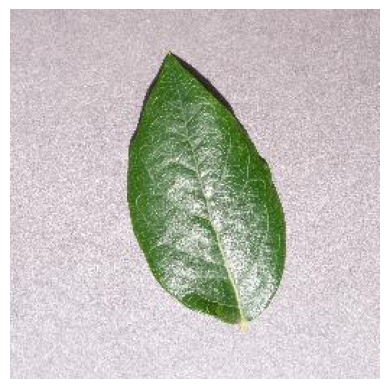

In [ ]:
image_path = '/content/plantvillage dataset/color/Blueberry___healthy/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG'

# Read the image
img = mpimg.imread(image_path)
print(type(img))
print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Blueberry___healthy/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG'
# Read the image
img = mpimg.imread(image_path)

print(img)


[[[197 186 192]
  [189 178 184]
  [194 183 189]
  ...
  [187 172 177]
  [190 175 180]
  [177 162 167]]

 [[196 185 191]
  [186 175 181]
  [190 179 185]
  ...
  [192 177 182]
  [194 179 184]
  [182 167 172]]

 [[196 185 191]
  [184 173 179]
  [187 176 182]
  ...
  [180 165 170]
  [191 176 181]
  [190 175 180]]

 ...

 [[219 212 219]
  [221 214 221]
  [232 225 232]
  ...
  [213 206 213]
  [213 206 213]
  [219 212 219]]

 [[207 200 207]
  [217 210 217]
  [218 211 218]
  ...
  [223 216 223]
  [217 210 217]
  [222 215 222]]

 [[222 215 222]
  [232 225 232]
  [219 212 219]
  ...
  [230 223 230]
  [232 225 232]
  [228 221 228]]]


In [ ]:
# Train Test Split

In [ ]:

# Image Parameters
img_size = 224
batch_size = 32

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
train_generator.num_classes

38

In [ ]:
# Convolutional Neural Network

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model training

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
  74/1358 [>.............................] - ETA: 1:13:15 - loss: 3.5696 - accuracy: 0.2563

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Predictive System

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}


In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/test_apple_black_rot.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

In [ ]:
# Save the model
model.save('plant_disease_prediction_model.h5')
